In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import glob
import cv2
#import seaborn as sns
%matplotlib inline

In [2]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie

In [3]:
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

# 興奮前面・後面解析

In [4]:
out_dir = '/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171101'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

KeyboardInterrupt: 

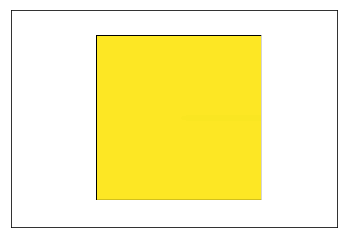

In [6]:
dir_names = ['20171014-40', '20171014-42', '20171014-4', '20171014-46']
time = 1000
width = 5
for dir_name in dir_names:
    print(dir_name)
    hj_array = np.zeros((time+1, 200, 200))
    m_array = np.zeros((time+1, 200, 200))
    Ina = np.zeros((time+1, 200, 200))
    print('start loading...')
    for i in range(time):
        num = '{0:04d}'.format(i)
        a = np.load('/mnt/recordings/SimulationResults/%s/cell_%s/%s' % (dir_name, num, 'h.npy')).reshape((200, 200))
        b = np.load('/mnt/recordings/SimulationResults/%s/cell_%s/%s' % (dir_name, num, 'j.npy')).reshape((200, 200))
        hj_array[i, :, :] = a*b
        Ina[i, :, :] = np.load('/mnt/recordings/SimulationResults/%s/cell_%s/%s' % (dir_name, num, 'xina.npy')).reshape((200, 200))
    print('end')
    
    for i in range(time):
        if not os.path.exists(os.path.join(out_dir, dir_name, 'hj')):
            os.makedirs(os.path.join(out_dir, dir_name, 'hj'))
        num = "{0:04d}".format(i)
        plt.imshow(hj_array[i], vmin=np.min(hj_array), vmax=np.max(hj_array))
        plt.xticks([])
        plt.yticks([])
        plt.savefig(os.path.join(out_dir, '%s/hj/%s.png'%(dir_name, num)), dpi=300)
        plt.close()
    
        if not os.path.exists(os.path.join(out_dir, dir_name, 'ina')):
            os.makedirs(os.path.join(out_dir, dir_name, 'ina'))
        plt.imshow((np.sum((Ina[i-width:i, :, :] < -1), axis=0) > 0), vmin=0, vmax=1, cmap='Reds')
        plt.xticks([])
        plt.yticks([])
        plt.savefig(os.path.join(out_dir, '%s/ina/%s.png'%(dir_name, num)), dpi=300)
        plt.close()
    
    for i in range(time):
        num = "{0:04d}".format(i)
        hj = cv2.cvtColor(cv2.imread(os.path.join(out_dir, '20171014-40/hj/%s.png'%num)), cv2.COLOR_BGR2RGB)
        ina = cv2.cvtColor(cv2.imread(os.path.join(out_dir, '20171014-40/ina/%s.png'%num)), cv2.COLOR_BGR2RGB)
        
        ina_threshold = (ina[:, :, 2] < 128) * (ina[:, :, 2] > 3) * 1
        
        data = np.zeros_like(hj)
        data[:, :, 0] = ina_threshold*255+(1-ina_threshold)*hj[:, :, 0]
        data[:, :, 1] = (1-ina_threshold)*hj[:, :, 1]
        data[:, :, 2] = (1-ina_threshold)*hj[:, :, 2]

        if not os.path.exists(os.path.join(out_dir, dir_name, 'integrate')):
            os.makedirs(os.path.join(out_dir, dir_name, 'integrate'))
        plt.imshow(data)
        plt.xticks([])
        plt.yticks([])
        plt.savefig(os.path.join(out_dir, dir_name, 'integrate/%s.png'%num), dpi=300)
        plt.close()